In [1]:
from lightkurve import KeplerTargetPixelFile as ktpf
from lightkurve import KeplerLightCurveFile
import lightkurve
from tqdm import tqdm

In [2]:
target = 'KIC11453592'
lc = lightkurve.search_lightcurvefile(target, quarter=6).download().PDCSAP_FLUX.normalize()
for q in tqdm(range(6, 17)):
    try:
        lc = lc.append(lightkurve.search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX.normalize())
    except:
        pass
lc = lc.remove_nans()

100%|██████████| 11/11 [00:19<00:00,  1.75s/it]


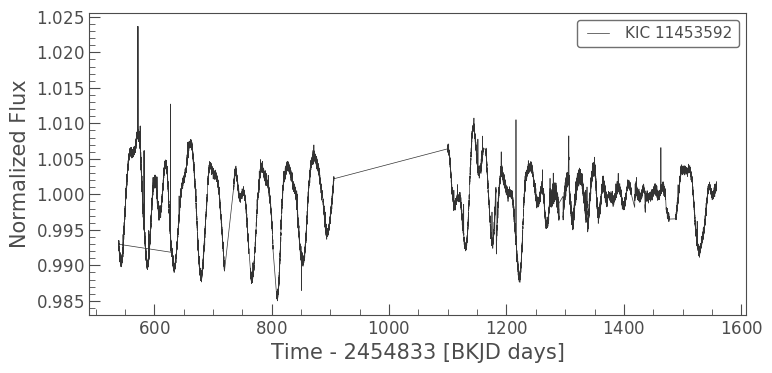

In [3]:
lc.plot()

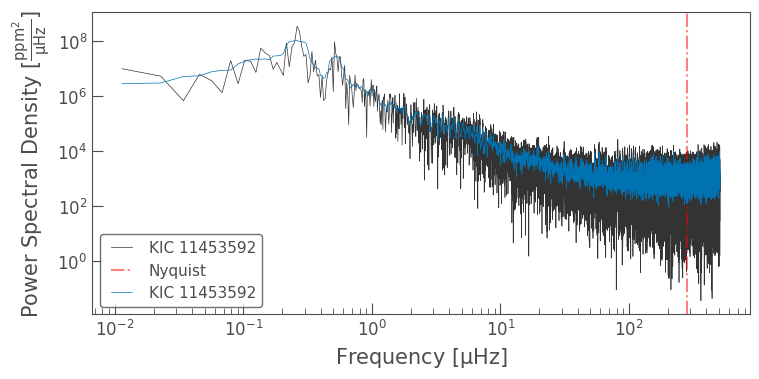

In [21]:
from astropy import units as u
pgl = lc.to_periodogram(freq_unit=u.microhertz, nyquist_factor=1.8)
ax = pgl.plot(scale='log')
ax.axvline(pgl.nyquist.value, c='r', linestyle='-.',label='Nyquist', alpha=.5)
pgl.smooth().plot(scale='log', ax=ax)

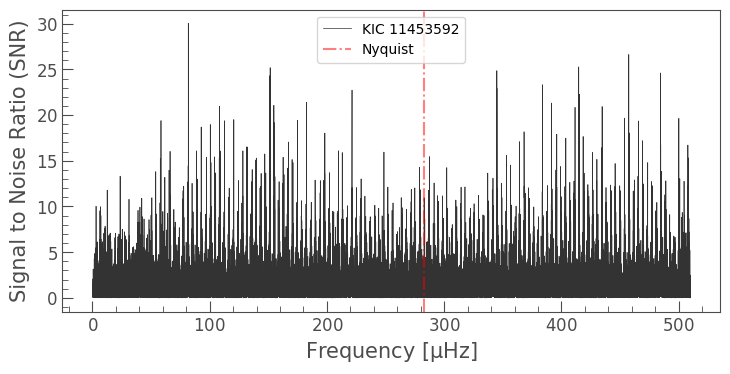

In [22]:
snrl = pgl.flatten()
ax = snrl.plot()
ax.axvline(pgl.nyquist.value, c='r', linestyle='-.',label='Nyquist', alpha=.5)
ax.legend()

In [24]:
snrl.to_table().to_pandas().to_csv('kic11453592_snr_spectrum.csv')